In [1]:

import numpy as np
import matplotlib.pyplot as plt
from  Reson_Sim.Resonator import Resonator as rs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import keras

t =np.linspace(4,11,50)
c = np.linspace(0,100,10)
print(c)
corr_min = []
rs1 = rs(Temp=t,concentration=1)

[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
co2 at abs depth of 1%
Gases: co2, 


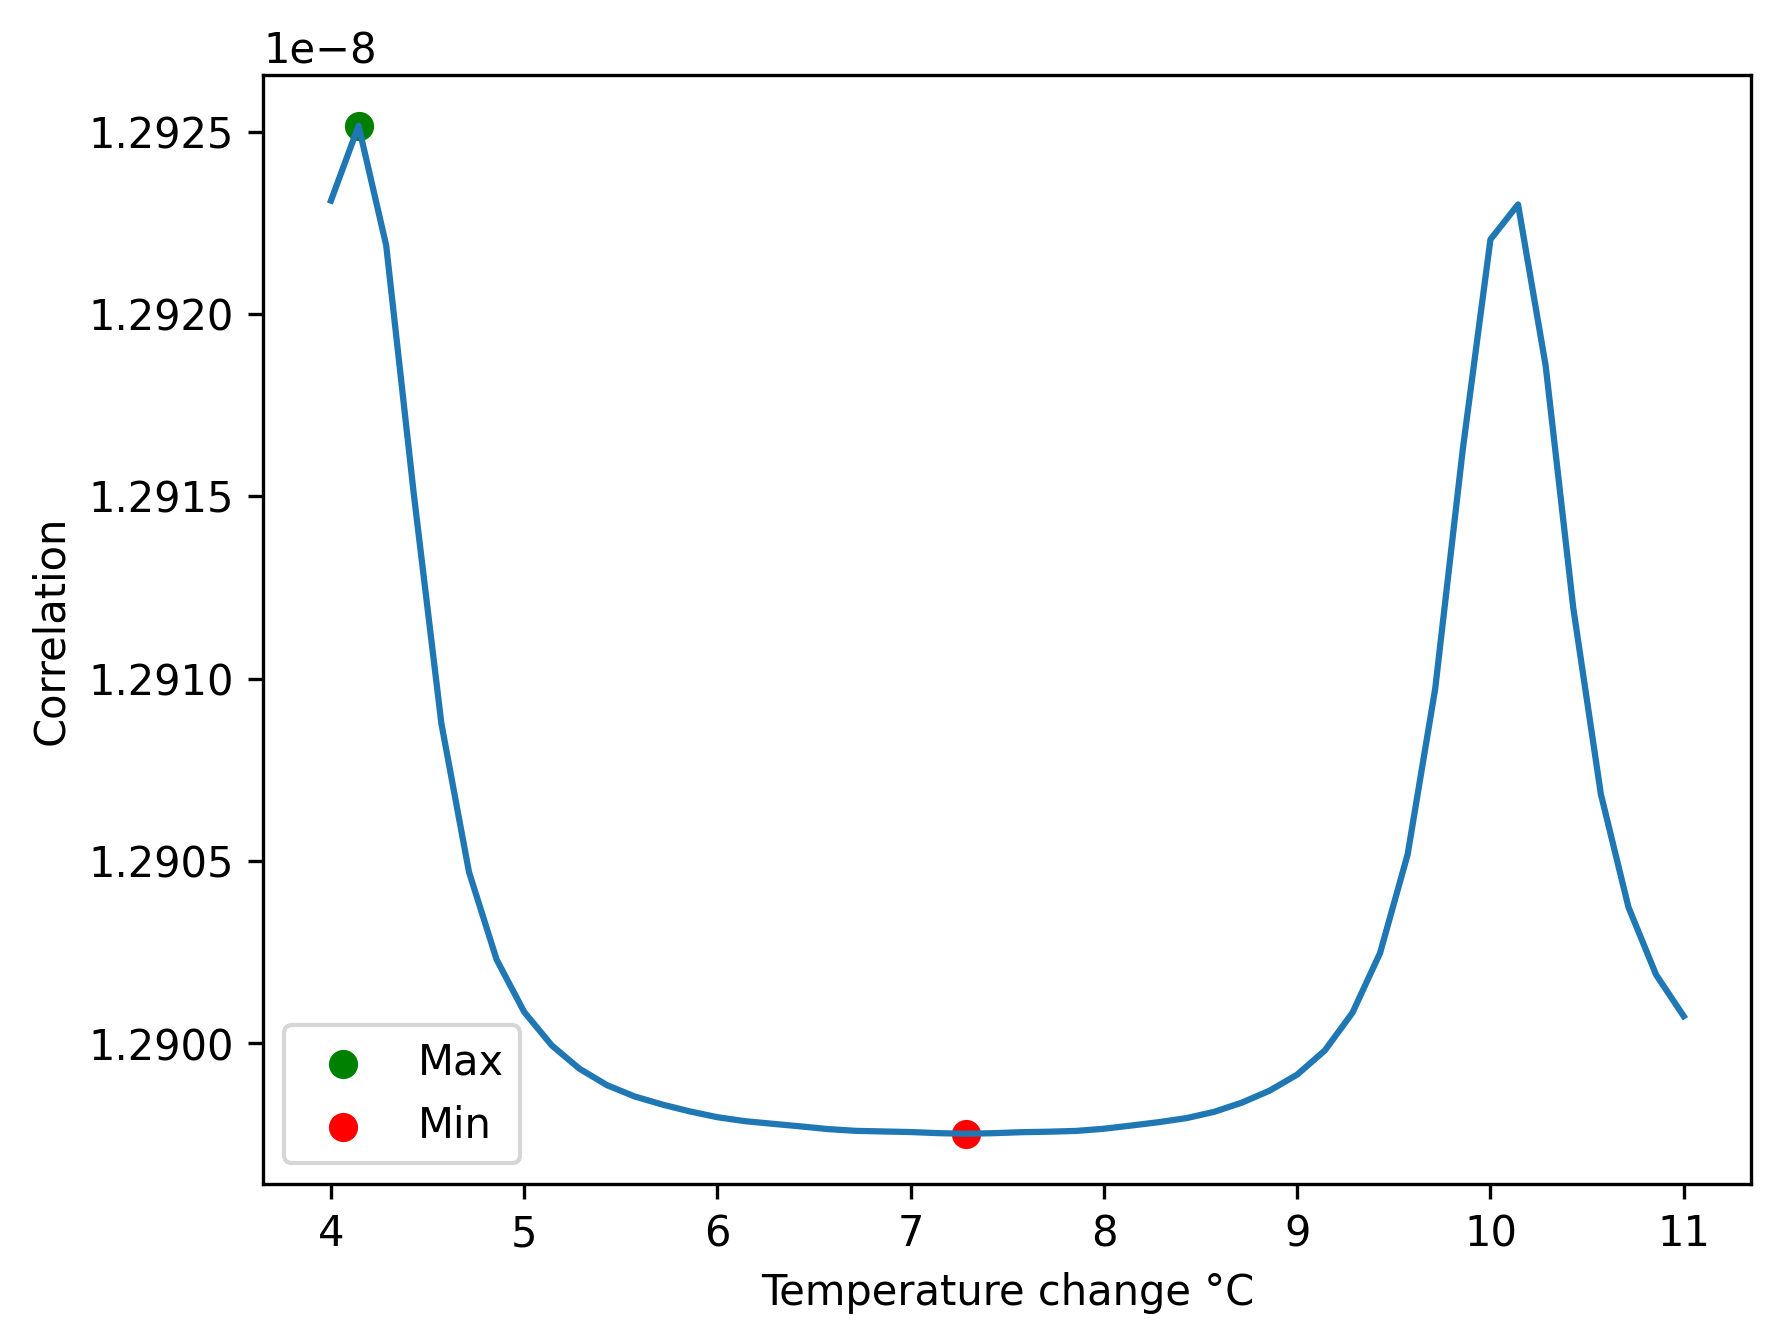

In [2]:
rs1.display_correlation()


In [3]:
for i in c:
    r = rs(Temp=t,concentration=i)
    corr_min.append(r.cmin())

corr_min = np.array(corr_min)   
print(corr_min) 

Gases: 
co2 at abs depth of 11.11111111111111%
Gases: co2, 
co2 at abs depth of 22.22222222222222%
Gases: co2, 
co2 at abs depth of 33.33333333333333%
Gases: co2, 
co2 at abs depth of 44.44444444444444%
Gases: co2, 
co2 at abs depth of 55.55555555555556%
Gases: co2, 
co2 at abs depth of 66.66666666666666%
Gases: co2, 
co2 at abs depth of 77.77777777777777%
Gases: co2, 
co2 at abs depth of 88.88888888888889%
Gases: co2, 
co2 at abs depth of 100.0%
Gases: co2, 
[2.76339443e-11 2.76307655e-11 2.76275867e-11 2.76244080e-11
 2.76212292e-11 2.76180504e-11 2.76148716e-11 2.76116929e-11
 2.76085141e-11 2.76053353e-11]


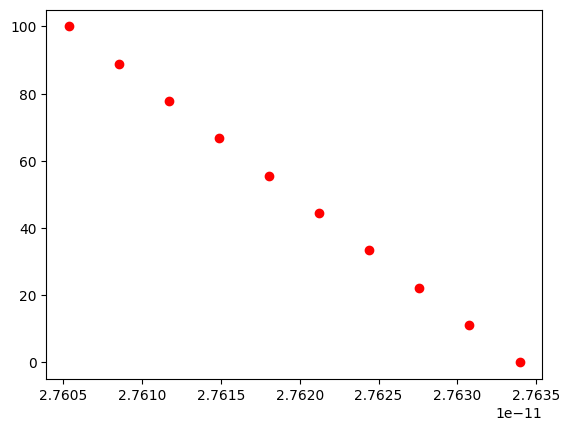

In [4]:
plt.scatter(corr_min,c,c="r")

In [5]:
model = Sequential(
)

model.add(Dense(64, input_dim = 1, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

model.fit(corr_min, c, epochs=200, batch_size=128)


Epoch 1/200
1/1 [==============================] - 1s 737ms/step - loss: 3518.5183 - mse: 3518.5183 - mae: 50.0000
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 3517.5503 - mse: 3517.5503 - mae: 49.9924
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 3516.4910 - mse: 3516.4910 - mae: 49.9846
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 3515.1016 - mse: 3515.1016 - mae: 49.9738
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 3514.1519 - mse: 3514.1519 - mae: 49.9648
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 3512.7122 - mse: 3512.7122 - mae: 49.9532
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 3511.1868 - mse: 3511.1868 - mae: 49.9402
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 3509.4602 - mse: 3509.4602 - mae: 49.9261
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 3508.2676 - mse: 3508.2

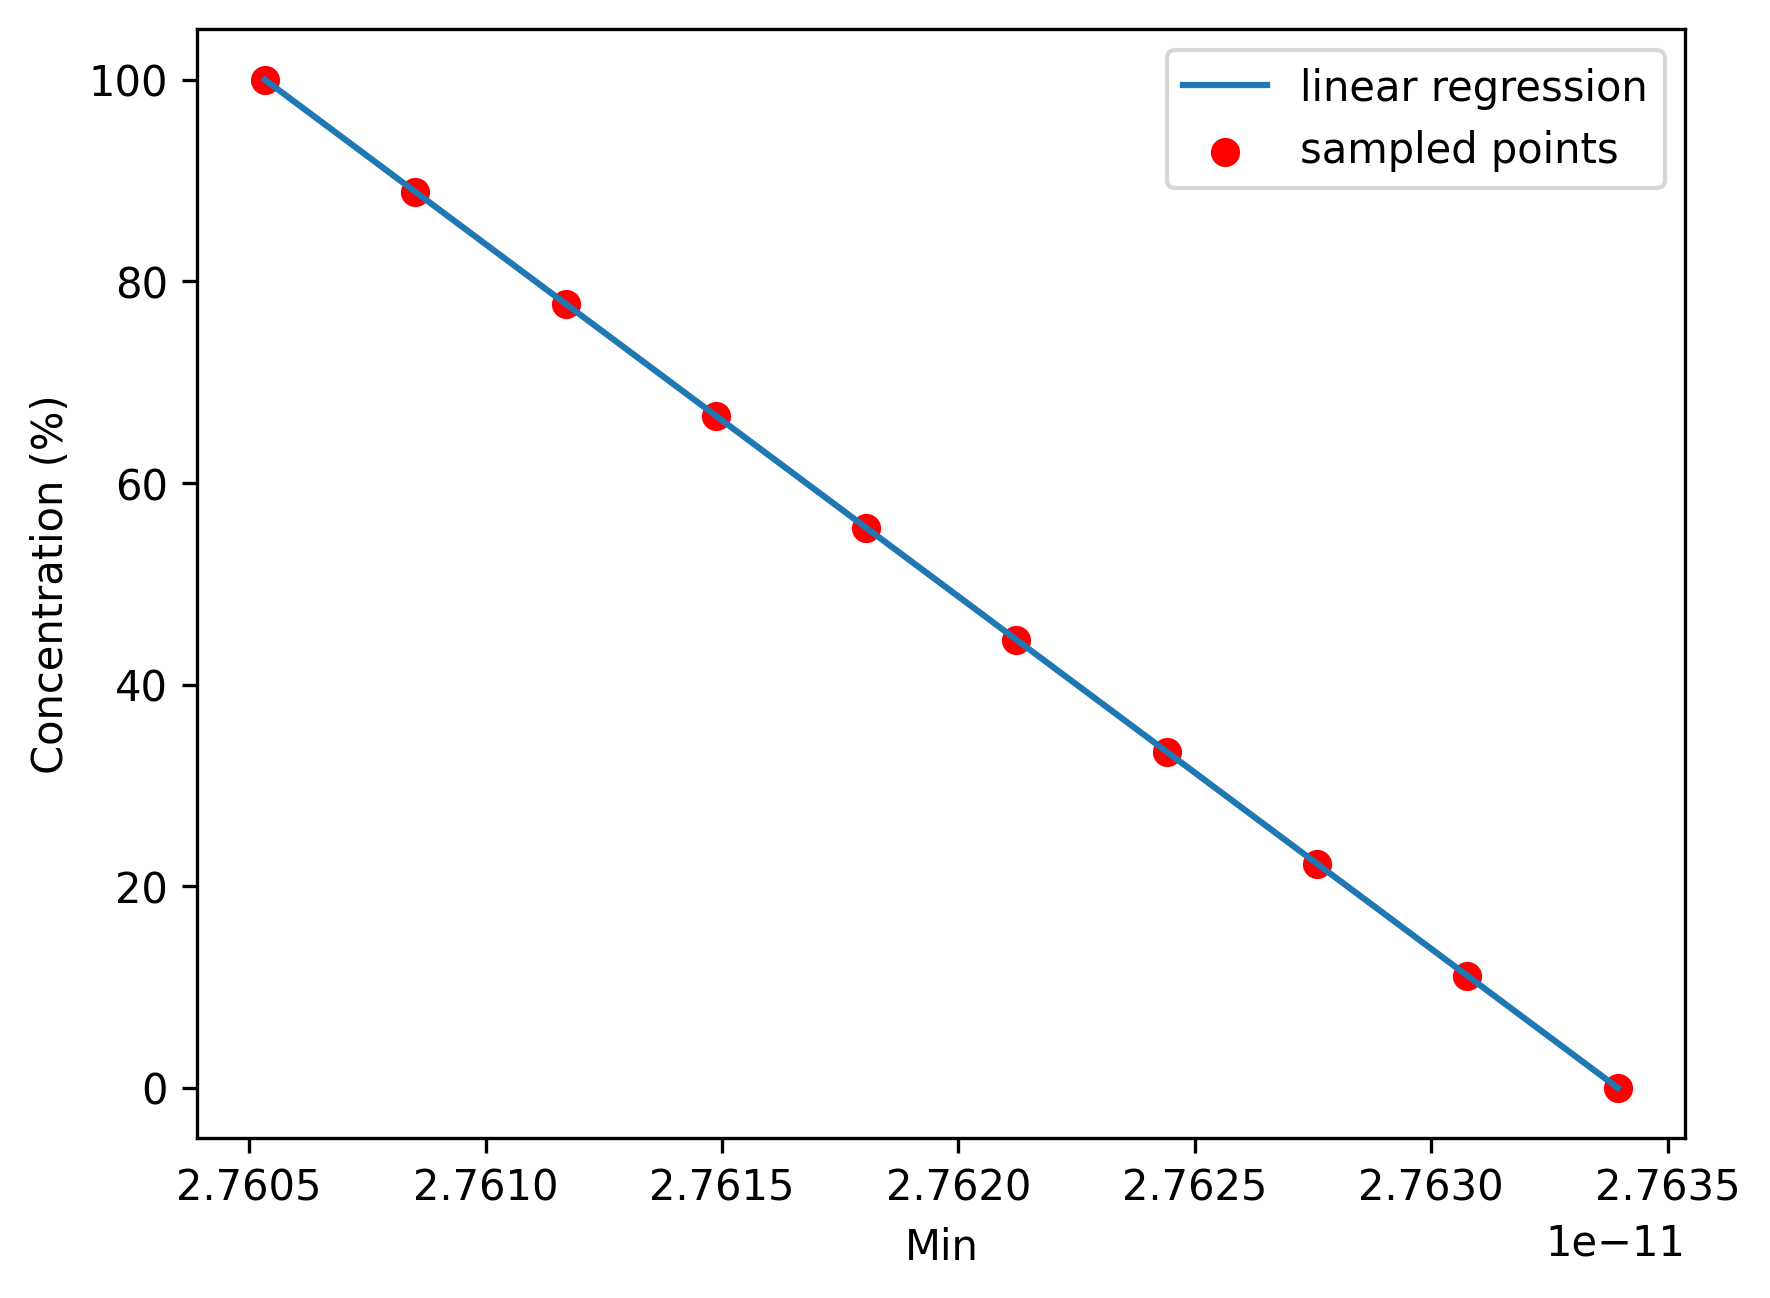

In [6]:
from scipy.stats import linregress

m1 = linregress(corr_min,c)
f = lambda x: m1.intercept+x*m1.slope
#m1.rvalue,m1.intercept,m1.slope
x = np.linspace(min(corr_min),max(corr_min),50)
y = np.vectorize(f)(x)
plt.figure(dpi= 300)
plt.plot(x,y)
plt.scatter(corr_min,c,c="r")
plt.ylabel('Concentration (%)')
plt.xlabel('Min')
plt.legend(["linear regression","sampled points"])


In [7]:
import random as rnd

rnd.seed()
c1 = rnd.randrange(0,10**4)/10**3
rs2 = rs(Temp=t,concentration=c1)
f(rs2.cmin())


co2 at abs depth of 4.552%
Gases: co2, 


4.552000006369781

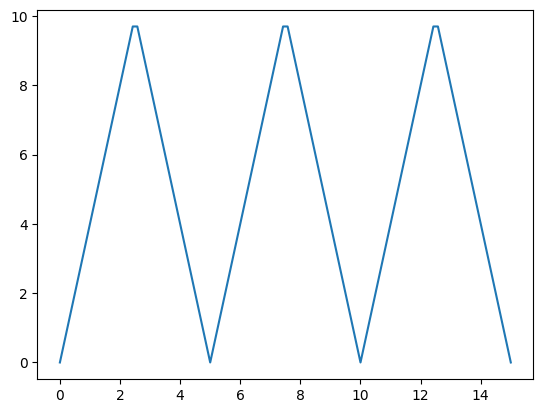

In [8]:
def _triangle(period,peak,now_time) -> float:
    
    now_frac = now_time//(period/2) #euclidian division 
    now_mod = now_frac%2 #which period are we on obtained by modulus
    #linear function going from 0 to peak in period/2
    if now_mod == 0: #if in first half of the triangle positive slope
        return 2*peak/period*(now_time-period/2*now_frac)
    else:
        return peak*(1-1/period*2*(now_time-period/2*now_frac))
    
f = lambda x: _triangle(5,10,x)    
x = np.linspace(0,15,100)
y = np.vectorize(f)(x)

plt.plot(x,y)


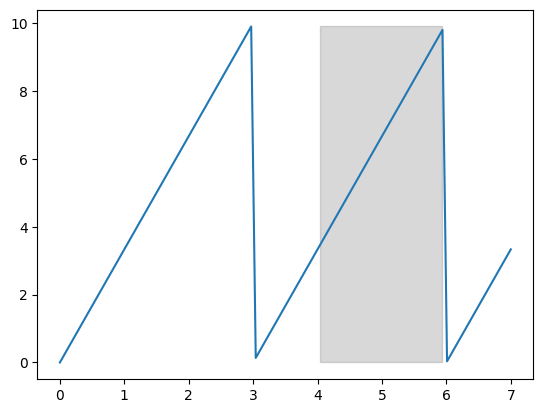

In [16]:
def _triangle(period,peak,now_time) -> float:
    
    now_frac = now_time//(period) #euclidian division 
    now_mod = now_frac%2 #which period are we on obtained by modulus
    #linear function going from 0 to peak in period/2
    #if now_mod == 0: #if in first half of the triangle positive slope
    #    return peak/period*(now_time-period*now_frac)
    #else:
    #    return peak*(1-1/period*2*(now_time-period/2*now_frac))
    return peak/period*(now_time-period*now_frac)
    
f = lambda x: _triangle(3,10,x)    
x = np.linspace(0,7,100)
y = np.vectorize(f)(x)

plt.plot(x,y)
cond = np.logical_and(x>=4 , x<=6)
plt.fill_between(x[cond],len(x[cond])*[max(y)],color='gray',
                 alpha=0.3)

In [ ]:
def _triangle(period,peak,now_time) -> float:
    
    now_frac = now_time//(period) #euclidian division 
    now_mod = now_frac%2 #which period are we on obtained by modulus
    #linear function going from 0 to peak in period/2
    if now_mod == 0: #if in first half of the triangle positive slope
        return peak/period*(now_time-period*now_frac)
    else:
        return peak*(1-1/period*2*(now_time-period/2*now_frac))
    
    
f = lambda x: _triangle(0.1,100,x)    
x = np.linspace(0,0.1,100)
y = np.vectorize(f)(x)

plt.plot(x,y)
